## Import libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Function which scrapes data from a list of URLs

In [2]:
def scraper(list_of_urls):
  names = []
  heights = []

  #for each url in the list, make a request to that url's server
  for url in list_of_urls:
    page = requests.get(url)

    if page.status_code == 200:
      #import the raw html into beautiful soup
      soup = BeautifulSoup(page.content, 'html.parser')

      #find all the td tags with a class 'sidearm-table-player-name '
      tags_with_names = soup.find_all('td', class_ = 'sidearm-table-player-name')

      #extract all the names from the tags
      for name in tags_with_names:
        names.append(name.get_text().strip('\n'))

      tags_with_heights = soup.find_all('td', class_ = 'height')

      #extract all the heights from the tags
      for raw_height in tags_with_heights:
        if raw_height.get_text() == '-':
          heights.append(np.nan)
        else:
          #converting the heights to inches
          raw_height = raw_height.get_text().split('-')
          feet_in_inches = float(raw_height[0]) * 12
          inches = float(raw_height[1])
          height= feet_in_inches + inches

          #append the converted height to the heights list
          heights.append(height)

  #build dataframe
  athletes_heights = {'Names': names, 'Height': heights}
  athletes_heights_df = pd.DataFrame(athletes_heights)

  #finding the average height prior to replacing the nans
  mean_values = athletes_heights_df['Height'].mean()

  athletes_heights_df['Height'] = athletes_heights_df['Height'].fillna((mean_values))

  return athletes_heights_df, mean_values

## Set the url

In [3]:
athletes_record = {
                    'Womens_Volleyball':['https://bmccathletics.com/sports/womens-volleyball/roster', 'https://yorkathletics.com/sports/womens-volleyball/roster','https://hostosathletics.com/sports/womens-volleyball/roster','https://bronxbroncos.com/sports/womens-volleyball/roster/2021','https://queensknights.com/sports/womens-volleyball/roster', 'https://augustajags.com/sports/wvball/roster', 'https://flaglerathletics.com/sports/womens-volleyball/roster', 'https://pacersports.com/sports/womens-volleyball/roster', 'https://www.golhu.com/sports/womens-volleyball/roster'],
                    'Womens_Swimming': ['https://csidolphins.com/sports/womens-swimming-and-diving/roster', 'https://queensknights.com/sports/womens-swimming-and-diving/roster', 'https://yorkathletics.com/sports/womens-swimming-and-diving/roster', 'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim', 'https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster', 'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster', 'https://mckbearcats.com/sports/womens-swimming-and-diving/roster', 'https://ramapoathletics.com/sports/womens-swimming-and-diving/roster', 'https://keanathletics.com/sports/womens-swimming-and-diving/roster', 'https://oneontaathletics.com/sports/womens-swimming-and-diving/roster'],
                    'Mens_Volleyball' : ['https://ccnyathletics.com/sports/mens-volleyball/roster', 'https://lehmanathletics.com/sports/mens-volleyball/roster', 'https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster', 'https://johnjayathletics.com/sports/mens-volleyball/roster', 'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster', 'https://mecathletics.com/sports/mens-volleyball/roster', 'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster', 'https://yorkathletics.com/sports/mens-volleyball/roster', 'https://ballstatesports.com/sports/mens-volleyball/roster'],
                    'Mens_Swimming' : ['https://csidolphins.com/sports/mens-swimming-and-diving/roster', 'https://yorkathletics.com/sports/mens-swimming-and-diving/roster','https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster', 'https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster', 'https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster', 'https://mckbearcats.com/sports/mens-swimming-and-diving/roster', 'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster', 'https://oneontaathletics.com/sports/mens-swimming-and-diving/roster', 'https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22', 'https://albrightathletics.com/sports/mens-swimming-and-diving/roster/2021-22']
}

## 1. Processing data from the womens swim team

In [4]:
womens_swim_team, womens_swim_avg = scraper(athletes_record['Womens_Swimming'])

In [5]:
womens_swim_team.round()

,Names,Height
0,Aurelia Barbagallo,63.0
1,Jacqueline DeFranco,65.0
2,Katherine Ebrahim,69.0
3,Jessica Johnson,68.0
4,Brooke Manning,66.0
...,...,...
148,Emma Stephenson,67.0
149,Callie Stinson,64.0
150,Alyssa Thompson,66.0
151,Samantha Vezza,66.0


## Womens swimming Team avg

In [6]:
womens_swim_avg.round()

66.0

## 5 Tallest Women Swimmers

.nlargest(n, 'name_of_column')

In [7]:
womens_swim_team.nlargest(30, 'Height')

,Names,Height
80,McKenzie Fazio,75.0
68,Maja Piotrowicz,73.0
51,Kornelia Buszka,71.0
85,Presley Heitzmann,71.0
117,Grace Geyer,71.0
59,Adi Luker,70.0
61,Stephanie Marks,70.0
90,Victoria Maki,70.0
93,Gabriela Novais Lima,70.0
96,Karley Sonnenberg,70.0


## 5 Shortest Women Swimmers

.nsmallest(n, 'name_of_column')

In [8]:
womens_swim_team.nsmallest(44, 'Height')

,Names,Height
22,Melanie Rodriguez,59.0
26,Micaela Reyes,59.0
12,Asha Besaw,61.0
18,Kristen Flores,61.0
31,Amanda Lee,61.0
105,Camila Mercado,61.0
106,Valeria Pages,61.0
118,Taylor Jacobson,61.0
7,Deanna Soueid,62.0
21,Fatima Morrobel,62.0


## 2. Processing data from the womens volleyball team

In [9]:
womens_volleyball_team, womens_volleyball_avg = scraper(athletes_record['Womens_Volleyball'])


In [10]:
womens_volleyball_team.round()

,Names,Height
0,Crystal Saw,64.0
1,Yisneily Morales,61.0
2,Sarah Sellami,68.0
3,Marie Claire Hurtado,68.0
4,Garyana Altidor,61.0
...,...,...
121,Sabrina Valentin,68.0
122,Sherian Horner,71.0
123,Alyssa Daley,75.0
124,Myka Costanzo,64.0


## Womens volleyball Team avg

In [11]:
womens_volleyball_avg.round()

68.0

## 5 Tallest womens volleyball players

In [12]:
womens_volleyball_team.nlargest(18, 'Height')

,Names,Height
70,Kayli Cleaver,76.0
65,Savannah Davis,75.0
67,Sophia Kruczko,75.0
86,Molly Boyd,75.0
123,Alyssa Daley,75.0
73,Madelyn Eden,74.0
55,Lindsay Osterhoudt,73.0
68,Lauren Posa,73.0
72,Jada Suguturaga,73.0
80,Meredith Dixon,73.0


## 5 Shortest womens volleyball players

In [13]:
womens_volleyball_team.nsmallest(28, 'Height')

,Names,Height
26,Samara Correa,60.0
1,Yisneily Morales,61.0
4,Garyana Altidor,61.0
17,Jasmine Vega,61.0
34,Rashel Torres,61.0
110,Izabella De Lima,61.0
16,Shamonie Miller,62.0
27,Genesis Sigaran,62.0
39,Brianna Rodriguez,62.0
114,Salma Villa Morales,62.0


## 3. Processing data from the mens volleyball team

In [14]:
mens_volleyball_team, mens_volleyball_avg = scraper(athletes_record['Mens_Volleyball'])

In [15]:
mens_volleyball_team.round()

,Names,Height
0,Angel Gabriel Chabla,63.0
1,Jeffrey Celis,69.0
2,Edwin Fierros Gaytan,68.0
3,Prabodh KC,72.0
4,Ethan Sherpa,71.0
...,...,...
119,Braydon Savitski-Lynde,72.0
120,Patrick Rogers,79.0
121,Lukas Pytlak,74.0
122,Will Patterson,82.0


## Mens volleyball team average

In [16]:
mens_volleyball_avg.round()

72.0

## 5 Tallest mens volleyball players

In [17]:
mens_volleyball_team.nlargest(31, 'Height')

,Names,Height
122,Will Patterson,82.0
48,Kyle Barriffe-Johnson,79.0
67,Akil Vaughn,79.0
106,Griffin Satterfield,79.0
120,Patrick Rogers,79.0
85,Jimmy Chang,78.0
89,Matisse Lee-Maarek,78.0
102,Peter Zurawski,78.0
107,Trevor Phillips,78.0
108,Vanis Buckholz,78.0


## 5 Shortest mens volleyball players

In [18]:
mens_volleyball_team.nsmallest(25, 'Height')

,Names,Height
0,Angel Gabriel Chabla,63.0
16,Chris Mata,63.0
34,Bryce Glasper,64.0
22,Wai Lin,65.0
32,Dion Csikortos,65.0
65,Jonathan Liao,65.0
5,David Reyes Galvez,67.0
12,Ray Rodriguez,67.0
14,Miguel Gonzalez,67.0
18,Jimmy Evans,67.0


## 4. Processing data from the mens swim team

In [19]:
mens_swim_team, mens_swim_avg = scraper(athletes_record['Mens_Swimming'])

In [20]:
mens_swim_team

,Names,Height
0,Anthony Attenborough,70.0
1,James Curran,69.0
2,Charles Cusumano,64.0
3,David Fayngersh,70.0
4,Michael Graham,70.0
...,...,...
171,Kieran Hassard,72.0
172,Anthony Laite,69.0
173,Drew MacDonald,72.0
174,Kyle Morken,73.0


## Mens swimming Team average

In [21]:
mens_swim_avg.round()

71.0

## 5 Tallest mens swimmers

In [22]:
mens_swim_team.nlargest(31, 'Height')

,Names,Height
81,Colton Grimes,79.0
104,Tyson Upton,79.0
153,Eric Kroon,77.0
50,Mattia Giurgevich,76.0
64,Adam Szcerba,76.0
99,Matthew Stooke,76.0
149,Brian Harding,76.0
169,Nicholas Griffith,76.0
21,Youssef Elkhouly,75.0
71,Owen Brubaker,75.0


## 5 Shortest mens swimmers

In [23]:
mens_swim_team.nsmallest(13, 'Height')

,Names,Height
78,Miles Fleischer,63.0
2,Charles Cusumano,64.0
41,Joseph Scarpetta,65.0
86,Wyatt Kurtz,65.0
111,Samuel De Leon,65.0
110,Tyler Canteen,66.0
114,AJ Guevara,66.0
131,James Llewellyn,66.0
144,Zachary Ciriaco,66.0
147,Christopher Egan,66.0


## Sending the dataframe to csv file

In [24]:
womens_volleyball_team.to_csv('Womens_Volleyball.csv', index=False)
womens_swim_team.to_csv('Womens_Swimming.csv', index=False)
mens_volleyball_team.to_csv('Mens_Volleyball.csv', index=False)
mens_swim_team.to_csv('Mens_Swimming.csv', index=False)


## Create a dataframe with averages

In [25]:
avg_heights ={'Team Category': ['Womens Swim Team', 'Womens Volleyball Team', 'Mens Volleyball', 'Mens Swimming' ],
              'Avg Height'   : [womens_swim_avg, womens_volleyball_avg, mens_swim_avg, mens_volleyball_avg ]
              }

In [26]:
avg_heights_df = pd.DataFrame(avg_heights)

In [27]:
avg_heights_df.round()

,Team Category,Avg Height
0,Womens Swim Team,66.0
1,Womens Volleyball Team,68.0
2,Mens Volleyball,71.0
3,Mens Swimming,72.0


## Create a bar plot

In [28]:
bar_color = 'skyblue'

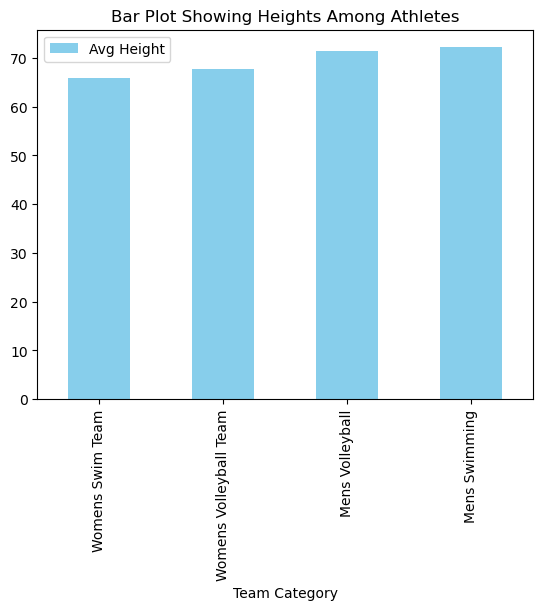

In [29]:
avg_heights_df.plot.bar(x ='Team Category', y = 'Avg Height', rot = 90, title = 'Bar Plot Showing Heights Among Athletes',color=bar_color)
plt.show()